✅ Model Performance
RMSE: 0.041
R² Score: 0.869


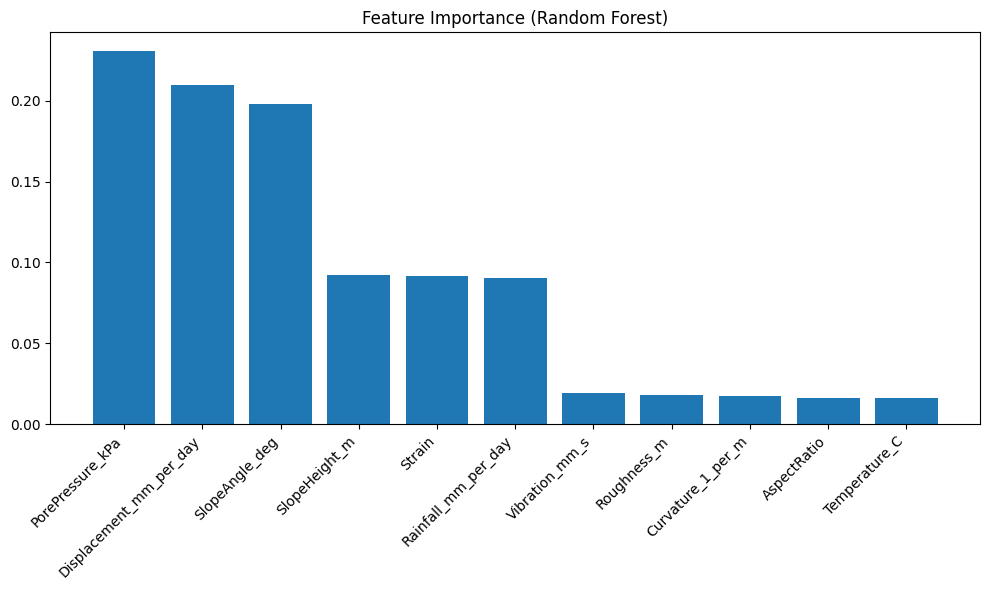

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("rockfall_dataset.csv")


X = df.drop(columns=["RockfallProbability","RockfallRisk"])   # target column removed

y = df["RockfallProbability"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=200,     
    max_depth=10,          
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()


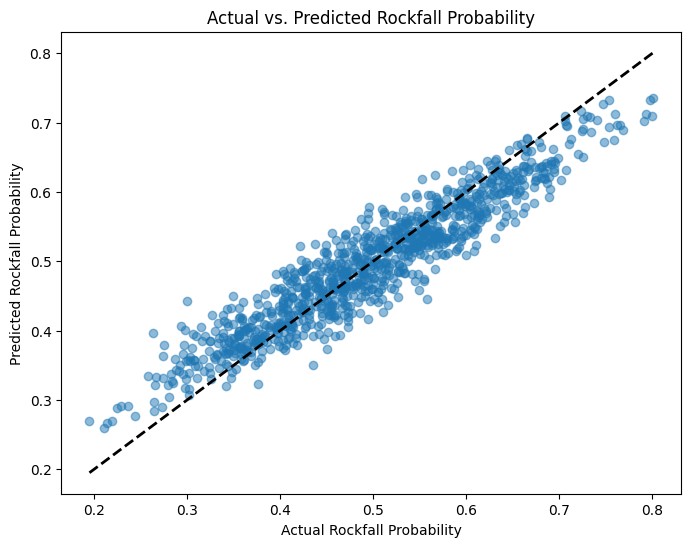

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rockfall Probability')
plt.ylabel('Predicted Rockfall Probability')
plt.title('Actual vs. Predicted Rockfall Probability')
plt.show()

In [4]:
X

,SlopeAngle_deg,SlopeHeight_m,AspectRatio,Curvature_1_per_m,Roughness_m,Displacement_mm_per_day,Strain,PorePressure_kPa,Rainfall_mm_per_day,Temperature_C,Vibration_mm_s
0,32.472407,84.790749,0.685733,-0.000330,3.649992,9.237084,0.006381,308.602389,29.891204,23.197296,16.944732
1,67.042858,99.952775,0.632786,0.246747,0.922560,6.075373,0.004593,29.062699,9.481778,42.669537,9.890341
2,53.919637,172.364005,0.429000,0.062667,1.733198,60.419195,0.009645,310.007567,12.635922,49.775073,3.909312
3,45.919509,74.600833,0.989447,-0.416697,3.316403,96.611632,0.002190,53.937617,18.067113,43.630462,14.732836
4,19.361118,175.233440,0.819611,-0.314420,2.410447,50.272131,0.005879,358.068677,20.365333,23.845717,8.373563
...,...,...,...,...,...,...,...,...,...,...,...
4995,63.843839,172.954638,1.046149,0.377039,1.637435,95.227545,0.004344,379.476615,19.341834,34.897808,10.407709
4996,17.162861,180.526679,0.431138,-0.453186,3.634832,74.782421,0.004636,384.618198,31.945150,19.047743,14.686141
4997,29.670570,189.874504,0.266611,-0.196302,4.616370,1.945586,0.005297,142.089022,35.340798,39.959803,16.450545
4998,58.944723,85.522719,1.087850,-0.056680,3.186428,40.100484,0.009676,222.816688,28.682205,30.840436,12.996955


In [5]:
df.columns

Index(['SlopeAngle_deg', 'SlopeHeight_m', 'AspectRatio', 'Curvature_1_per_m',
       'Roughness_m', 'Displacement_mm_per_day', 'Strain', 'PorePressure_kPa',
       'Rainfall_mm_per_day', 'Temperature_C', 'Vibration_mm_s',
       'RockfallProbability', 'RockfallRisk'],
      dtype='object')

In [3]:
import pickle

# Save the trained model to a pickle file
filename = 'rockfall_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to rockfall_model.pkl
